<a href="https://colab.research.google.com/github/Engrgit/Curacel-tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- 


---

#      AI Engine for POC Execution

---



<img src="https://www.internationalbreweriesplc.com/sites/default/files/home.jpg" width="1000"> -->

# AI Engine for Brand Segmentaton
*Model No: 2*




![alt text](https://www.internationalbreweriesplc.com/sites/default/files/home.jpg)

 Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground")

Install Detectron2 

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=98b61a00ea0c82b8f9aa2481628a3c999de4d529d93203a3fbe47cffc6591a43
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-1bo1lf3r
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-1bo1lf3r
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [ ]:
# install detectron2:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 675kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post200513-cp36-none-any.whl size=40893 sha256=802bea03ae0b46549fbaaf5725021ee2e912baec39e421afc36d3fd6e0c204f6
  Stored in directory: /root/.cache/pip/wheels/a2/f6/77/551770c4b8cd75e9335cd0acf59c08d60a8684048b19da6702
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

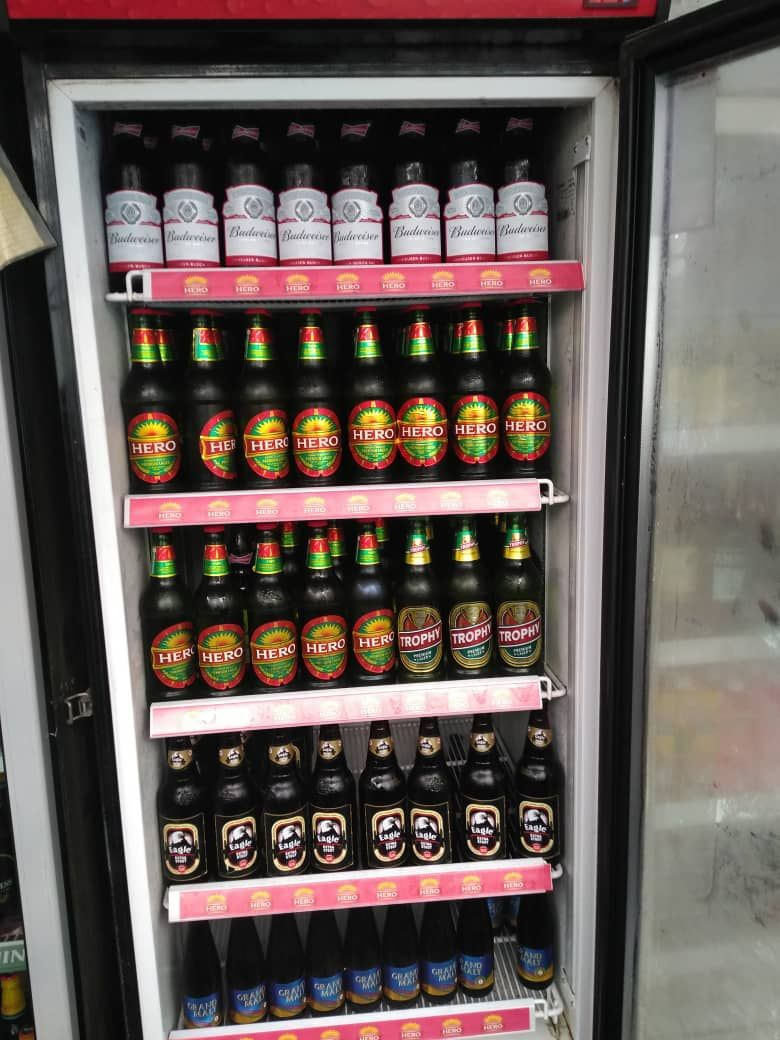

In [ ]:
# get a new image into the model
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./random_image.jpg")
cv2_imshow(im)


We first download a random image to test the system:

# Run a pre-trained model on an instance of our Image

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
# cfg = get_cfg()
# # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# predictor = DefaultPredictor(cfg)
# outputs = predictor(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_a3ec72.pkl: 254MB [00:19, 13.3MB/s]                           


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes
outputs["instances"].pred_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

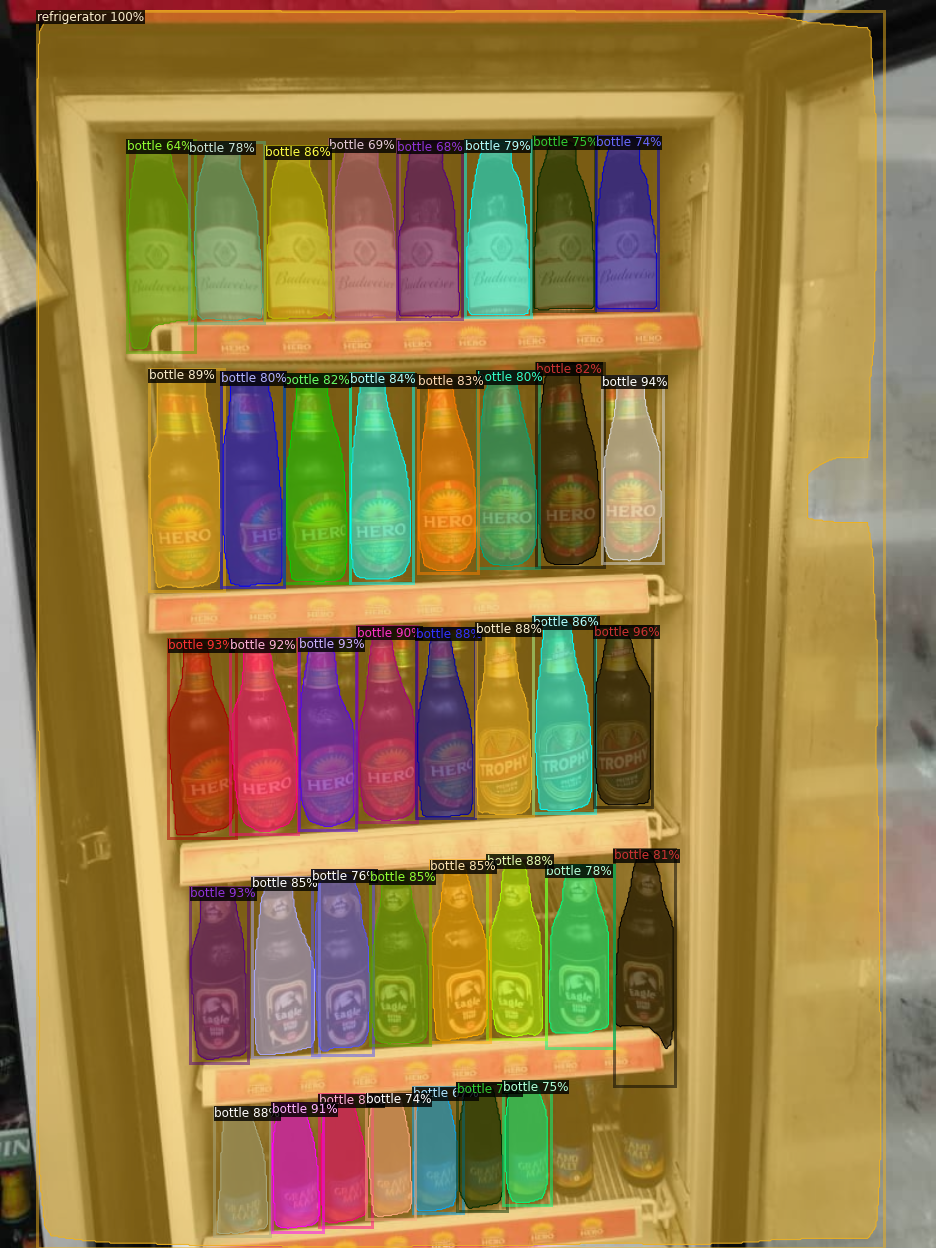

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
#  # lets figure out a way to conver the supervisely code into coco format before we can train
# #let git clone the supervisely repository 
# # I need to change the working directory to this directory
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train")
# !git clone  https://github.com/TemitopeOladokun/Supervisely2COCO.git

In [ ]:
# #convert the train dataset into json coco format
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train/ABI_train/ann" "train.json"

In [ ]:
# #convert the val dataset into json coco format for Train1
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train1")
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train1/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train1/ABI_Train1/ann" "train1.json"

In [ ]:
# #convert the val dataset into json coco format for Train2
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train2")
# !git clone  https://github.com/TemitopeOladokun/Supervisely2COCO.git
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train2/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train2/ABI_Train2/ann" "train2.json"

In [ ]:
# # #convert the val dataset into json coco format for Train2
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train3")
# !git clone  https://github.com/TemitopeOladokun/Supervisely2COCO.git
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train3/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train3/ABI_Train3/ann" "train3.json"

In [ ]:
# # #convert the val dataset into json coco format for Val
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val")
# !git clone  https://github.com/TemitopeOladokun/Supervisely2COCO.git
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val/ABI_Val0/ann" "val.json"

In [ ]:
# # #convert the val dataset into json coco format for Train5
# os.chdir("/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train6")
# #!git clone  https://github.com/TemitopeOladokun/Supervisely2COCO.git
# !python Supervisely2COCO/supervisely2coco.py "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train6/meta.json" "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train6/ABI_Train6/ann" "train6.json"

# Train on a custom dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.
 

## Prepare the dataset

In [ ]:
# #  # we dont need to run this cell since i had already registered the account

# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("ABI_Train", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train/train.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train/Dataset_3/ann")
# register_coco_instances("ABI_Train1", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train1/train1.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train1/ABI_Train1/ann")
# register_coco_instances("ABI_Train2", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train2/train2.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train2/ABI_Train2/ann")
# register_coco_instances("ABI_Train3", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train3/train3.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train3/ABI_Train3/ann")
# register_coco_instances("ABI_Train4", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train4/train4.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train4/ABI_Train4/ann")
# register_coco_instances("ABI_Train5", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train5/train5.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train5/ABI_Train5/ann")
# register_coco_instances("ABI_Train6", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train6/train6.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Train6/ABI_Train6/ann")

# #register for validation
# register_coco_instances("ABI_Val0", {}, "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val/val.json", "/content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val/ABI_Val0/ann")


## Train!

Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the ABI dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.


Lets load in our data into the model

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("ABI_Train", "ABI_Train1", "ABI_Train2", "ABI_Train3","ABI_Train4","ABI_Train5","ABI_Train6" )
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 128 for toy set)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 19  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)


[05/17 12:27:41 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (20, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (20,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (76, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (76,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (19, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (19,) in the model! Skipped.


Lets train the Model

In [ ]:
trainer.train()

[05/17 12:28:05 d2.engine.train_loop]: Starting training from iteration 0
[05/17 12:28:35 d2.utils.events]:  eta: 0:15:50  iter: 19  total_loss: 4.106  loss_cls: 2.992  loss_box_reg: 0.353  loss_mask: 0.693  loss_rpn_cls: 0.050  loss_rpn_loc: 0.025  time: 1.2074  data_time: 1.1436  lr: 0.000005  max_mem: 4083M
[05/17 12:28:58 d2.utils.events]:  eta: 0:16:18  iter: 39  total_loss: 4.024  loss_cls: 2.833  loss_box_reg: 0.421  loss_mask: 0.691  loss_rpn_cls: 0.043  loss_rpn_loc: 0.022  time: 1.1788  data_time: 0.7281  lr: 0.000010  max_mem: 4286M
[05/17 12:29:20 d2.utils.events]:  eta: 0:15:20  iter: 59  total_loss: 3.643  loss_cls: 2.495  loss_box_reg: 0.424  loss_mask: 0.686  loss_rpn_cls: 0.039  loss_rpn_loc: 0.021  time: 1.1417  data_time: 0.6659  lr: 0.000015  max_mem: 4286M
[05/17 12:29:42 d2.utils.events]:  eta: 0:14:51  iter: 79  total_loss: 3.018  loss_cls: 1.904  loss_box_reg: 0.401  loss_mask: 0.677  loss_rpn_cls: 0.052  loss_rpn_loc: 0.020  time: 1.1277  data_time: 0.6889  lr:

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("ABI_Val0", )
predictor = DefaultPredictor(cfg)

We can also evaluate its performance using AP metric implemented in COCO API.
This gives an Average Precision AP is the metric

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("ABI_Val0", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "ABI_Val0")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [05/17 12:46:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/17 12:46:15 d2.data.datasets.coco]: Loaded 115 images in COCO format from /content/drive/My Drive/Colab Notebooks/Brand Segmentation/Testing Ground/Val/val.json
WARNING [05/17 12:46:15 d2.data.datasets.coco]: Filtered out 963 instances without valid segmentation. There might be issues in your dataset generation process.
[05/17 12:46:15 d2.data.build]: Distribution of instances among all 18 categories:
|  category  | #instances   |   category   | #instances   |   category    | #instances   |
|:----------:|:-------------|:------------:|:-------------|:-------------:|:-------------|
| Budweiser  | 95           |    Trophy    | 400          |     Hero      | 19           |
| Grand_Malt | 23           |  Beta_Malt   | 46           | Contamination | 2            |
|   Glass    | 1            |    Chest     | 0            |  Competitors  | 4            

ValueError: ignored

# Another approach with panoptic segmentation

model_final_a6e10b.pkl: 237MB [00:19, 12.4MB/s]                           


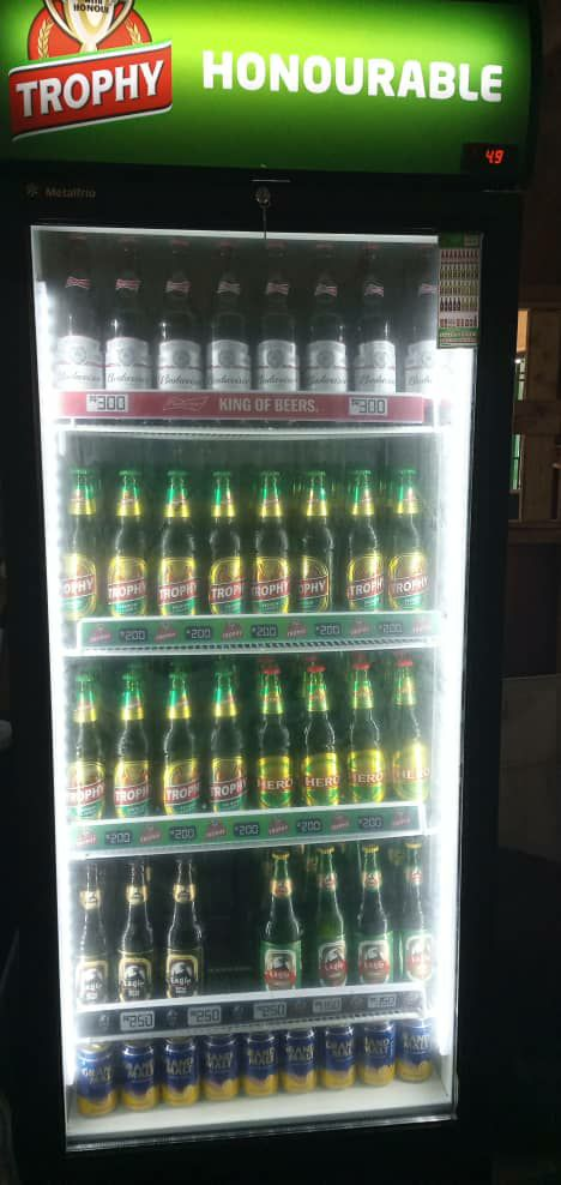

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

model_final_cafdb1.pkl: 261MB [00:24, 10.6MB/s]                           


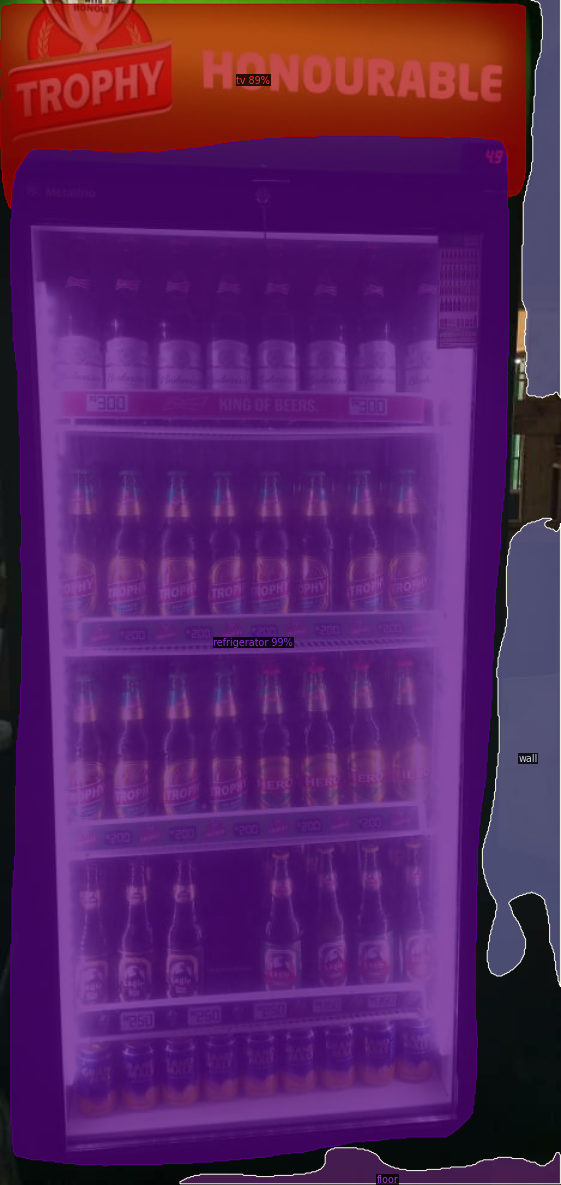

In [ ]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

# Run panoptic segmentation on a video

In [ ]:
# # This is the video we're going to process
# from IPython.display import YouTubeVideo, display
# video = YouTubeVideo("ll8TgCZ0plk", width=500)
# display(video)

In [ ]:
# # Install dependencies, download the video, and crop 5 seconds for processing
# !pip install youtube-dl
# !pip uninstall -y opencv-python opencv-contrib-python
# !apt install python3-opencv  # the one pre-installed have some issues
# !youtube-dl https://www.youtube.com/watch?v=ll8TgCZ0plk -f 22 -o video.mp4
# !ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

In [ ]:
# # Run frame-by-frame inference demo on this video (takes 3-4 minutes)
# # Using a model trained on COCO dataset
# !git clone https://github.com/facebookresearch/detectron2
# !python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
#   --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

In [ ]:
# # Download the results
# from google.colab import files
# files.download('video-output.mkv')